In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName('heart-disease-mining') \
    .config("spark.sql.debug.maxToStringFields", 1000) \
    .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 07:59:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# 2.1 data collection
df = spark.read.option("header", "true").option("inferSchema", "true").csv('Datasets/heart_2022_with_nans.csv')
df.count()

445132

In [3]:
# Describing data
df.printSchema()

root
 |-- State: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- GeneralHealth: string (nullable = true)
 |-- PhysicalHealthDays: double (nullable = true)
 |-- MentalHealthDays: double (nullable = true)
 |-- LastCheckupTime: string (nullable = true)
 |-- PhysicalActivities: string (nullable = true)
 |-- SleepHours: double (nullable = true)
 |-- RemovedTeeth: string (nullable = true)
 |-- HadHeartAttack: string (nullable = true)
 |-- HadAngina: string (nullable = true)
 |-- HadStroke: string (nullable = true)
 |-- HadAsthma: string (nullable = true)
 |-- HadSkinCancer: string (nullable = true)
 |-- HadCOPD: string (nullable = true)
 |-- HadDepressiveDisorder: string (nullable = true)
 |-- HadKidneyDisease: string (nullable = true)
 |-- HadArthritis: string (nullable = true)
 |-- HadDiabetes: string (nullable = true)
 |-- DeafOrHardOfHearing: string (nullable = true)
 |-- BlindOrVisionDifficulty: string (nullable = true)
 |-- DifficultyConcentrating: string (nullable = t

In [4]:
# Exploring the data
df.columns

['State',
 'Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'PhysicalActivities',
 'SleepHours',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

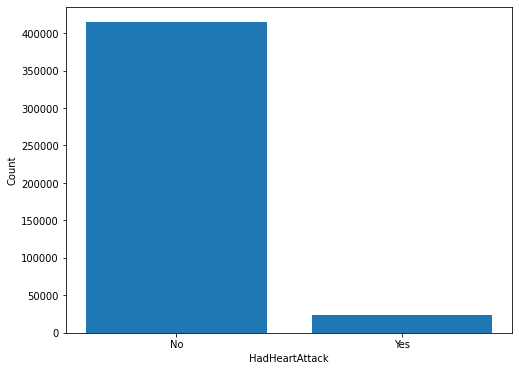

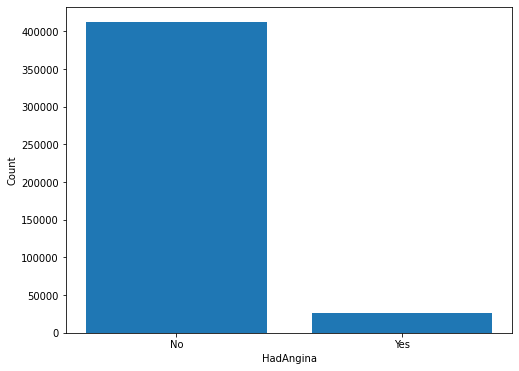

In [6]:
#2.3 Explore the data
import matplotlib.pyplot as plt

# Filter out null values in 'HadHeartAttack' and 'HadAngina' columns
df_filtered = df.filter(df['HadHeartAttack'].isNotNull() & df['HadAngina'].isNotNull())

# Count the values for 'HadHeartAttack'
had_heart_attack_counts = df_filtered.groupBy('HadHeartAttack').count().orderBy('HadHeartAttack').collect()

# Extract keys and values for 'HadHeartAttack'
had_heart_attack_keys = [row['HadHeartAttack'] for row in had_heart_attack_counts]
had_heart_attack_values = [row['count'] for row in had_heart_attack_counts]

# Plot the counts for 'HadHeartAttack'
plt.figure(figsize=(8, 6))
plt.bar(had_heart_attack_keys, had_heart_attack_values)
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.show()

# Count the values for 'HadAngina'
had_angina_counts = df_filtered.groupBy('HadAngina').count().orderBy('HadAngina').collect()

# Extract keys and values for 'HadAngina'
had_angina_keys = [row['HadAngina'] for row in had_angina_counts]
had_angina_values = [row['count'] for row in had_angina_counts]

# Plot the counts for 'HadAngina'
plt.figure(figsize=(8, 6))
plt.bar(had_angina_keys, had_angina_values)
plt.xlabel('HadAngina')
plt.ylabel('Count')
plt.show()


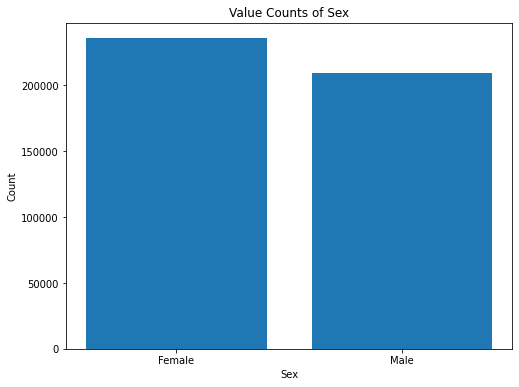

+-------------+------+-----+----+
|Sex_HadAngina|    No|  Yes|null|
+-------------+------+-----+----+
|         Male|191463|15480|2296|
|       Female|222713|11071|2109|
+-------------+------+-----+----+



+------------------+------+-----+----+
|Sex_HadHeartAttack|    No|  Yes|null|
+------------------+------+-----+----+
|              Male|192131|15417|1691|
|            Female|224828| 9691|1374|
+------------------+------+-----+----+



In [5]:
#2.3 Explore the data
import matplotlib.pyplot as plt
# Value counts for 'Sex'
sex_counts = df.groupBy('Sex').count().collect()

# Extract keys and values for 'Sex'
sex_keys = [row['Sex'] for row in sex_counts]
sex_values = [row['count'] for row in sex_counts]

# Plot the counts for 'Sex'
plt.figure(figsize=(8, 6))
plt.bar(sex_keys, sex_values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Value Counts of Sex')
plt.show()

# Crosstab for 'Sex' vs 'HadAngina'
crosstab_sex_hadangina = df.stat.crosstab("Sex", "HadAngina")
crosstab_sex_hadangina.show()

# Crosstab for 'Sex' vs 'HadHeartAttack'
crosstab_sex_hadheartattack = df.stat.crosstab("Sex", "HadHeartAttack")
crosstab_sex_hadheartattack.show()


24/05/19 04:08:47 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


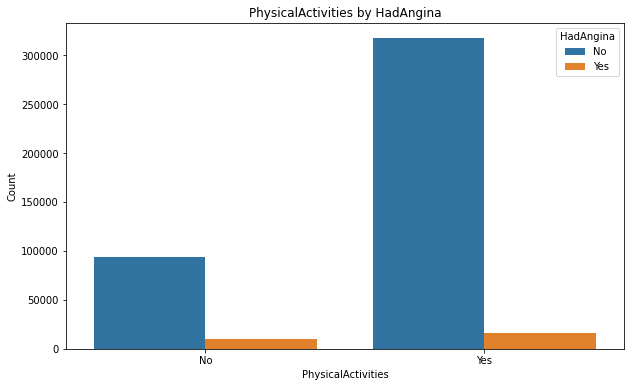

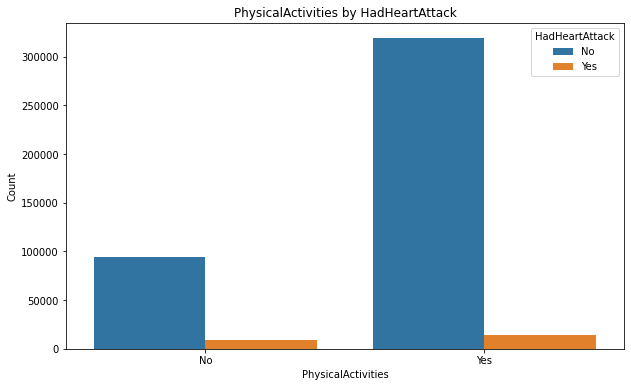

In [6]:
#2.3 Explore the data
import seaborn as sns

# Filter out rows with null values 
df_filtered = df.filter(df['PhysicalActivities'].isNotNull() & df['HadAngina'].isNotNull() & df['HadHeartAttack'].isNotNull())

# Convert to Pandas DataFrame for plotting
df_pandas = df_filtered.toPandas()

# Plot using Seaborn for PhysicalActivities and HadAngina
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysicalActivities', hue='HadAngina', data=df_pandas)
plt.xlabel('PhysicalActivities')
plt.ylabel('Count')
plt.title('PhysicalActivities by HadAngina')
plt.show()

# Plot using Seaborn for PhysicalActivities and HadHeartAttack
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysicalActivities', hue='HadHeartAttack', data=df_pandas)
plt.xlabel('PhysicalActivities')
plt.ylabel('Count')
plt.title('PhysicalActivities by HadHeartAttack')
plt.show()

In [6]:

# Filter out rows with null values 
df_filtered = df.filter(df['PneumoVaxEver'].isNotNull() & df['HadAngina'].isNotNull() & df['HadHeartAttack'].isNotNull())

# Convert to Pandas DataFrame for plotting
df_pandas = df_filtered.toPandas()

# Plot using Seaborn for PhysicalActivities and HadAngina
plt.figure(figsize=(10, 6))
sns.countplot(x='PneumoVaxEver', hue='HadAngina', data=df_pandas)
plt.xlabel('PneumoVaxEver')
plt.ylabel('Count')
plt.title('PneumoVaxEver by HadAngina')
plt.show()

# Plot using Seaborn for PhysicalActivities and HadHeartAttack
plt.figure(figsize=(10, 6))
sns.countplot(x='PneumoVaxEver', hue='HadHeartAttack', data=df_pandas)
plt.xlabel('PneumoVaxEver')
plt.ylabel('Count')
plt.title('PneumoVaxEver by HadHeartAttack')
plt.show()

NameError: name 'sns' is not defined

<Figure size 720x432 with 0 Axes>

In [17]:
from pyspark.sql.functions import when

df_filtered = df.filter(df['BMI'].isNotNull() & df['HadHeartAttack'].isNotNull() & df['HadAngina'].isNotNull())

# Create a new column for BMI category
df_filtered = df_filtered.withColumn('BMI_Category', when(df['BMI'] >= 30, '>= 30').otherwise('< 30'))

# Create Crosstab for BMI_Category and HadHeartAttack
crosstab_heartattack = df_filtered.stat.crosstab('BMI_Category', 'HadHeartAttack')
crosstab_heartattack.show()

# Create Crosstab for BMI_Category and HadAngina
crosstab_angina = df_filtered.stat.crosstab('BMI_Category', 'HadAngina')
crosstab_angina.show()

# Convert crosstabs to Pandas DataFrames for easier calculation and visualization
crosstab_heartattack_pandas = crosstab_heartattack.toPandas()
crosstab_angina_pandas = crosstab_angina.toPandas()

# Calculate percentage of 'Yes' for HadHeartAttack
crosstab_heartattack_pandas['Total'] = crosstab_heartattack_pandas['No'] + crosstab_heartattack_pandas['Yes']
crosstab_heartattack_pandas['Percentage_Yes'] = (crosstab_heartattack_pandas['Yes'] / crosstab_heartattack_pandas['Total']) * 100

# Calculate percentage of 'Yes' for HadAngina
crosstab_angina_pandas['Total'] = crosstab_angina_pandas['No'] + crosstab_angina_pandas['Yes']
crosstab_angina_pandas['Percentage_Yes'] = (crosstab_angina_pandas['Yes'] / crosstab_angina_pandas['Total']) * 100

print("Crosstab and Percentage of BMI Category and HadHeartAttack:")
print(crosstab_heartattack_pandas)

print("\nCrosstab and Percentage of BMI Category and HadAngina:")
print(crosstab_angina_pandas)


+---------------------------+------+-----+
|BMI_Category_HadHeartAttack|    No|  Yes|
+---------------------------+------+-----+
|                       < 30|246815|13443|
|                      >= 30|122043| 8476|
+---------------------------+------+-----+



+----------------------+------+-----+
|BMI_Category_HadAngina|    No|  Yes|
+----------------------+------+-----+
|                  < 30|245842|14416|
|                 >= 30|120861| 9658|
+----------------------+------+-----+

Crosstab and Percentage of BMI Category and HadHeartAttack:
  BMI_Category_HadHeartAttack      No    Yes   Total  Percentage_Yes
0                        < 30  246815  13443  260258        5.165259
1                       >= 30  122043   8476  130519        6.494074

Crosstab and Percentage of BMI Category and HadAngina:
  BMI_Category_HadAngina      No    Yes   Total  Percentage_Yes
0                   < 30  245842  14416  260258        5.539119
1                  >= 30  120861   9658  130519        7.399689


In [7]:
df_filtered = df.filter(df['SmokerStatus'].isNotNull() & df['HadHeartAttack'].isNotNull() & df['HadAngina'].isNotNull())

# Create Crosstab for SmokerStatus and HadHeartAttack
crosstab_heartattack = df_filtered.stat.crosstab('SmokerStatus', 'HadHeartAttack')
crosstab_heartattack.show()

# Create Crosstab for SmokerStatus and HadAngina
crosstab_angina = df_filtered.stat.crosstab('SmokerStatus', 'HadAngina')
crosstab_angina.show()

# Convert crosstabs to Pandas DataFrames for easier calculation and visualization
crosstab_heartattack_pandas = crosstab_heartattack.toPandas()
crosstab_angina_pandas = crosstab_angina.toPandas()

# Calculate percentage of 'Yes' for HadHeartAttack
crosstab_heartattack_pandas['Total'] = crosstab_heartattack_pandas['No'] + crosstab_heartattack_pandas['Yes']
crosstab_heartattack_pandas['Percentage_Yes'] = (crosstab_heartattack_pandas['Yes'] / crosstab_heartattack_pandas['Total']) * 100

# Calculate percentage of 'Yes' for HadAngina
crosstab_angina_pandas['Total'] = crosstab_angina_pandas['No'] + crosstab_angina_pandas['Yes']
crosstab_angina_pandas['Percentage_Yes'] = (crosstab_angina_pandas['Yes'] / crosstab_angina_pandas['Total']) * 100

print("Crosstab and Percentage of SmokerStatus and HadHeartAttack:")
print(crosstab_heartattack_pandas)

print("\nCrosstab and Percentage of SmokerStatus and HadAngina:")
print(crosstab_angina_pandas)



+---------------------------+------+----+
|SmokerStatus_HadHeartAttack|    No| Yes|
+---------------------------+------+----+
|       Current smoker - ...| 12760| 923|
|              Former smoker|102472|9291|
|               Never smoked|234264|8913|
|       Current smoker - ...| 32251|2961|
+---------------------------+------+----+



+----------------------+------+-----+
|SmokerStatus_HadAngina|    No|  Yes|
+----------------------+------+-----+
|  Current smoker - ...| 12895|  788|
|         Former smoker|101366|10397|
|          Never smoked|232481|10696|
|  Current smoker - ...| 32689| 2523|
+----------------------+------+-----+

Crosstab and Percentage of SmokerStatus and HadHeartAttack:
             SmokerStatus_HadHeartAttack      No   Yes   Total  Percentage_Yes
0  Current smoker - now smokes some days   12760   923   13683        6.745597
1                          Former smoker  102472  9291  111763        8.313127
2                           Never smoked  234264  8913  243177        3.665231
3  Current smoker - now smokes every day   32251  2961   35212        8.409065

Crosstab and Percentage of SmokerStatus and HadAngina:
                  SmokerStatus_HadAngina      No    Yes   Total  \
0  Current smoker - now smokes some days   12895    788   13683   
1                          Former smoker  101366  